In [1]:
import warnings
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw = pd.read_csv('Train_dataset.csv')

In [3]:
raw

Registration Number  Annual Turnover           Cuisine        City  \
0                   60001         42000000      indian,irish   Bangalore   
1                   60002         50000000      indian,irish      Indore   
2                   60003         32500000   tibetan,italian     Chennai   
3                   60004        110000000  turkish,nigerian     Gurgaon   
4                   60005         20000000     irish,belgian     Manesar   
...                   ...              ...               ...         ...   
3488                63489         40500000  algerian,belgian          -1   
3489                63490         32500000     tibetan,greek  Bangalore    
3490                63491         42500000      indian,irish     Chennai   
3491                63492         53000000     japanese,thai   Bangalore   
3492                63493         12000000      indian,irish   Ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  \
0                             95.80           1  ...   
1                             85.00           1  ...   
2                             68.20           1  ...   
3                             83.60           0  ...   
4                             76.80           1  ...   
...                             ...         ...  ...   
3488                          62.11           1  ...   
3489                          96.30           1  ...   
3490                          86.80           1  ...   
3491                          86.00           1  ...   
3492                          67.00           1  ...   

      Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                          10.0                4.0                 NaN   
1                           9.0                NaN                 4.0   
2                           8.0                3.0                 NaN   
3                           9.0                6.0                 NaN   
4                           6.0                NaN                 2.0   
...                         ...                ...                 ...   
3488                        9.0                5.0                 NaN   
3489                        NaN                4.0                 NaN   
3490                        8.0                NaN                 NaN   
3491                        7.0                3.0                 2.0   
3492                        NaN                1.0                 NaN   

      Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                    NaN                 NaN      8.0      8        6   
1                    NaN                 NaN      5.0      7   

In [4]:
raw['cusinine1']=raw['Cuisine'].str.split(',').str[0]
raw['cusinine2']=raw['Cuisine'].str.split(',').str[1]

In [5]:
raw['City'] = raw['City'].map(lambda x: x.lower().strip())

In [6]:
raw['City'] = raw['City'].replace('-1',np.nan)
raw['City'] = raw['City'].replace('vsakhapttnam','visakhapatnam')
raw['City'] = raw['City'].replace('vizag','visakhapatnam')
raw['City'] = raw['City'].replace('hyderabad(bhadurpally)','hyderabad')
raw['City'] = raw['City'].replace('kochi/cochin','kochi')
raw['City'] = raw['City'].replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')
raw['City'] = raw['City'].replace('punr','pune')
raw['City'] = raw['City'].replace('technopark, trivandrum','thiruvananthapuram')
#raw['City'] = raw['City'].replace('australia',np.nan)
raw['City'] = raw['City'].replace('am','ambala')
raw['City'] = raw['City'].replace('bhubaneswar','bhubaneshwar')
raw['City'] = raw['City'].replace('bhubneshwar','bhubaneshwar')
#raw['City'] = raw['City'].replace('dubai',np.nan)

raw['City'] = raw['City'].replace('indirapuram, ghaziabad','ghaziabad')
raw['City'] = raw['City'].replace('gaziabaad','ghaziabad')
raw['City'] = raw['City'].replace('jagdalpur','jabalpur')
raw['City'] = raw['City'].replace('delhi/ncr','delhi')

In [7]:
np.array(raw.groupby('City')['Registration Number'].count().reset_index()['City'])

array(['agra', 'ahmedabad', 'ahmednagar', 'allahabad', 'alwar', 'ambala',
       'angul', 'ariyalur', 'asansol', 'aurangabad', 'australia',
       'baddi hp', 'bahadurgarh', 'banagalore', 'bangalore', 'banglore',
       'bankura', 'bareli', 'baroda', 'bathinda', 'beawar', 'belgaum',
       'bellary', 'bengaluru', 'bhagalpur', 'bharuch', 'bhilai',
       'bhiwadi', 'bhopal', 'bhubaneshwar', 'bihar', 'bikaner',
       'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'calicut',
       'chandigarh', 'chandrapur', 'chennai', 'chennai & mumbai',
       'chennai, bangalore', 'cheyyar', 'coimbatore', 'daman and diu',
       'dehradun', 'delhi', 'dhanbad', 'dharamshala', 'dharmapuri',
       'dharuhera', 'dubai', 'durgapur', 'ernakulam', 'faridabad',
       'gagret', 'gajiabaad', 'gandhi nagar', 'gandhinagar', 'ganjam',
       'ghaziabad', 'gonda', 'greater noida', 'gulbarga', 'gurga',
       'gurgaon', 'gurgoan', 'gwalior', 'haridwar', 'hderabad', 'hissar',
       'hospete', 'howrah', 'hubli', 

In [71]:
city_tiers=['delhi','hyderabad','mumbai','kolkata','chennai','gurgaon','ahmedabad','kochi','bangalore']

In [10]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [72]:
def find_city(city)-> int:
    if (not isinstance(city,str) and  np.isnan(city )):
        return 0
    match, score = process.extractOne(city, city_tiers)
    if (score >= 80):
        return 1
    else:
        return 2


In [64]:
print('find_city',find_city(np.nan))

nan
find_city 0


In [73]:
raw['city_tier'] = raw['City'].map(lambda x: find_city(x) )

In [74]:
raw

Registration Number  Annual Turnover           Cuisine       City  \
0                   60001         42000000      indian,irish  bangalore   
1                   60002         50000000      indian,irish     indore   
2                   60003         32500000   tibetan,italian    chennai   
3                   60004        110000000  turkish,nigerian    gurgaon   
4                   60005         20000000     irish,belgian    manesar   
...                   ...              ...               ...        ...   
3488                63489         40500000  algerian,belgian        NaN   
3489                63490         32500000     tibetan,greek  bangalore   
3490                63491         42500000      indian,irish    chennai   
3491                63492         53000000     japanese,thai  bangalore   
3492                63493         12000000      indian,irish  ghaziabad   

     Restaurant Location Opening Day of Restaurant  \
0      Near Business Hub                  14/02/09   
1         Near Party Hub                  29/09/08   
2      Near Business Hub                  30/07/11   
3         Near Party Hub                  30/11/08   
4         Near Party Hub                  22/02/10   
...                  ...                       ...   
3488      Near Party Hub                  20/03/09   
3489      Near Party Hub                  05/02/12   
3490      Near Party Hub                  21/05/09   
3491      Near Party Hub                  22/06/08   
3492      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  ...  Value Deals Rating  \
0                             95.80           1  ...                 NaN   
1                             85.00           1  ...                 NaN   
2                             68.20           1  ...                 NaN   
3                             83.60           0  ...                 NaN   
4                             76.80           1  ...                 NaN   
...                             ...         ...  ...                 ...   
3488                          62.11           1  ...                 NaN   
3489                          96.30           1  ...                 NaN   
3490                          86.80           1  ...                 NaN   
3491                          86.00           1  ...                 NaN   
3492                          67.00           1  ...                 NaN   

      Live Sports Rating  Ambience  Lively  Service Comfortablility Privacy  \
0                    NaN       8.0       8        6               6       6   
1                    NaN       5.0       7        7               3       8   
2                    NaN       7.0      10        5               2       8   
3                    NaN       7.0       7        4               3       5   
4                    NaN       NaN       6        2               4       6   
...                  ...       ...     ...      ...             ...     ...   
3488                 NaN       7.0       7        6               6       8   
3489                 NaN       4.0       9        4               0       5   
3490                 3.0       6.0       8        3               3       7   
3491                 NaN       7.0       6        3               3       6   
3

In [75]:
raw.drop(columns=['Registration Number','Cuisine','City'],inplace=True)

In [76]:
raw

Annual Turnover Restaurant Location Opening Day of Restaurant  \
0            42000000   Near Business Hub                  14/02/09   
1            50000000      Near Party Hub                  29/09/08   
2            32500000   Near Business Hub                  30/07/11   
3           110000000      Near Party Hub                  30/11/08   
4            20000000      Near Party Hub                  22/02/10   
...               ...                 ...                       ...   
3488         40500000      Near Party Hub                  20/03/09   
3489         32500000      Near Party Hub                  05/02/12   
3490         42500000      Near Party Hub                  21/05/09   
3491         53000000      Near Party Hub                  22/06/08   
3492         12000000      Near Party Hub                  23/04/09   

      Facebook Popularity Quotient       Endorsed By  \
0                            84.30      Not Specific   
1                            85.40  Tier A Celebrity   
2                            85.00  Tier A Celebrity   
3                            85.60  Tier A Celebrity   
4                              NaN  Tier A Celebrity   
...                            ...               ...   
3488                         69.10      Not Specific   
3489                         91.00      Not Specific   
3490                         80.83      Not Specific   
3491                         79.40      Not Specific   
3492                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                             95.80           1                        1   
1                             85.00           1                        1   
2                             68.20           1                        1   
3                             83.60           0                        1   
4                             76.80           1                        1   
...                             ...         ...                      ...   
3488                          62.11           1                        1   
3489                          96.30           1                        1   
3490                          86.80           1                        1   
3491                          86.00           1                        1   
3492                          67.00           1                        1   

      Situated in a Multi Complex  Dedicated Parking  ...  Value Deals Rating  \
0                               1                  0  ...                 NaN   
1                               1                  1  ...                 NaN   
2                               1                  1  ...                 NaN   
3                               1                  1  ...                 NaN   
4                               1                  1  ...                 NaN   
...                           ...                ...  ...                 ...   
3488                            0                  1  ...                 NaN   
3489                            0                  1  ...                 NaN   
3490                            1                  1  ...                 NaN   
3491                            1                  1  ...                 NaN   
3492                            1                  1  ...                 NaN   

      Live Sports Rating Ambience Lively  Service  Comfortablility  Privacy  \
0                    NaN      8.0      8        6                6        6   
1                    NaN      5.0      7        7                3        8   
2                    NaN      7.0     10        5                2        8   
3                    NaN      7.0      7        4                3        5   
4                    NaN      NaN      6        2                4        6   
...                  ...      ...    ...      ...              ...      ...   
3488                 NaN      7.0      7 

In [77]:
def analze_categorical(df, tgt_feature):
    for col in df.columns:
    #print(raw[col].dtype)
        if df[col].dtype == 'object':
            plt.figure(figsize=(5,3))
            sns.barplot(df, x=col,y=tgt_feature)
            plt.show()

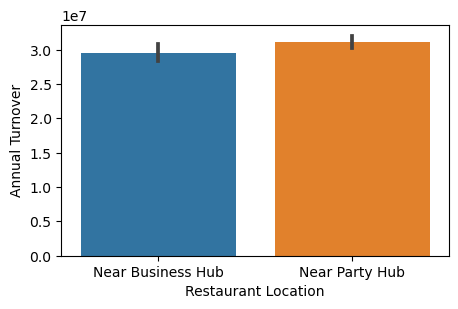

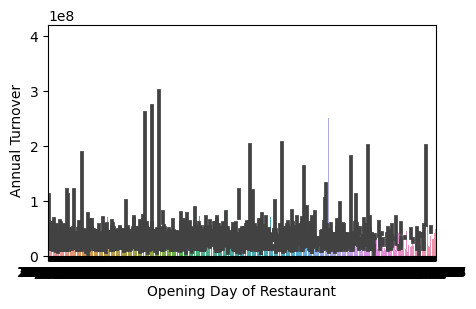

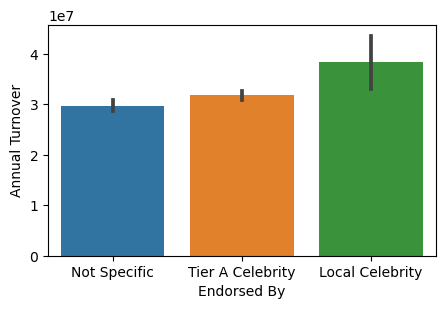

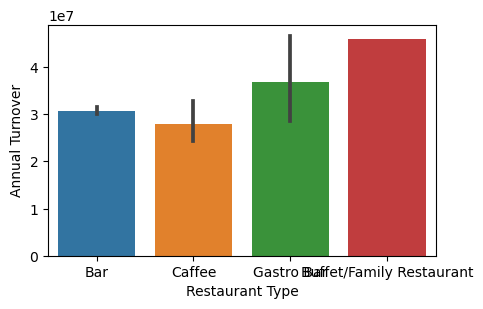

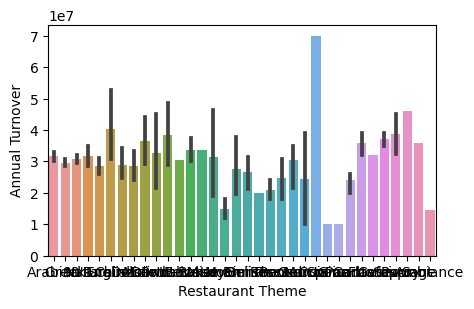

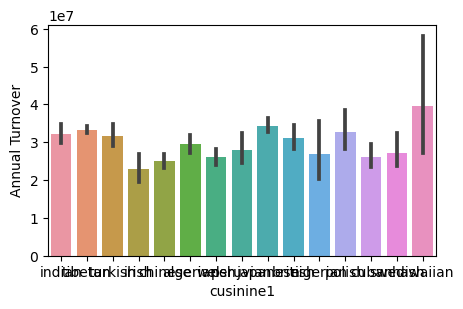

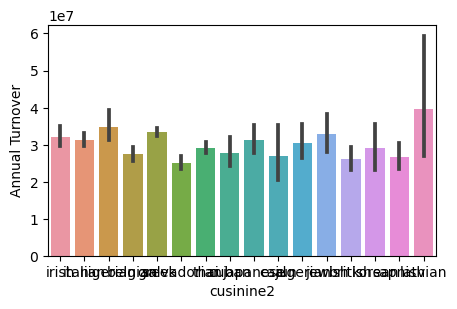

In [78]:
analze_categorical(raw,'Annual Turnover')

<Axes: xlabel='Restaurant Theme', ylabel='Annual Turnover'>

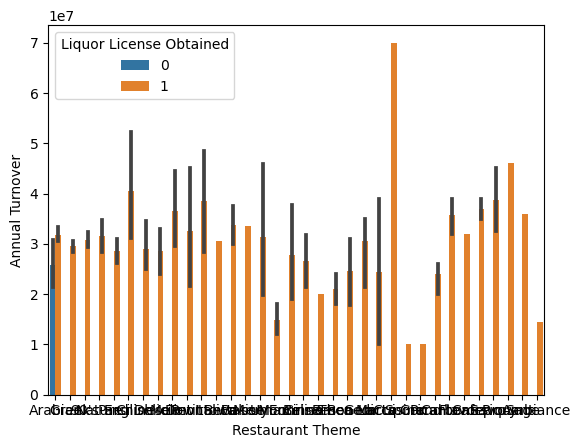

In [86]:
sns.barplot(raw, x='Restaurant Theme',y='Annual Turnover',hue='Liquor License Obtained')

In [87]:
raw['since_years']=raw['Opening Day of Restaurant'].map(lambda x: 24-int(x[0:2]) if 24-int(x[0:2]) >=0 else 0)

In [91]:
raw.drop(columns=['Opening Day of Restaurant'],inplace=True)

In [92]:
raw

Annual Turnover Restaurant Location  Facebook Popularity Quotient  \
0            42000000   Near Business Hub                         84.30   
1            50000000      Near Party Hub                         85.40   
2            32500000   Near Business Hub                         85.00   
3           110000000      Near Party Hub                         85.60   
4            20000000      Near Party Hub                           NaN   
...               ...                 ...                           ...   
3488         40500000      Near Party Hub                         69.10   
3489         32500000      Near Party Hub                         91.00   
3490         42500000      Near Party Hub                         80.83   
3491         53000000      Near Party Hub                         79.40   
3492         12000000      Near Party Hub                         72.00   

           Endorsed By  Instagram Popularity Quotient  Fire Audit  \
0         Not Specific                          95.80           1   
1     Tier A Celebrity                          85.00           1   
2     Tier A Celebrity                          68.20           1   
3     Tier A Celebrity                          83.60           0   
4     Tier A Celebrity                          76.80           1   
...                ...                            ...         ...   
3488      Not Specific                          62.11           1   
3489      Not Specific                          96.30           1   
3490      Not Specific                          86.80           1   
3491      Not Specific                          86.00           1   
3492      Not Specific                          67.00           1   

      Liquor License Obtained  Situated in a Multi Complex  Dedicated Parking  \
0                           1                            1                  0   
1                           1                            1                  1   
2                           1                            1                  1   
3                           1                            1                  1   
4                           1                            1                  1   
...                       ...                          ...                ...   
3488                        1                            0                  1   
3489                        1                            0                  1   
3490                        1                            1                  1   
3491                        1                            1                  1   
3492                        1                            1                  1   

      Open Sitting Available  ...  Live Sports Rating Ambience Lively  \
0                          1  ...                 NaN      8.0      8   
1                          0  ...                 NaN      5.0      7   
2                          0  ...                 NaN      7.0     10   
3                          1  ...                 NaN      7.0      7   
4                          1  ...                 NaN      NaN      6   
...                      ...  ...                 ...      ...    ...   
3488                       1  ...                 NaN      7.0      7   
3489                       0  ...                 NaN      4.0      9   
3490                       0  ...                 3.0      6.0      8   
3491                       1  ...                 NaN      7.0      6   
3492                       1  ...                 NaN      6.0      9   

      Service  Comfortablility  Privacy  cusinine1  cusinine2  city_tier  \
0           6                6        6     indian      irish          1   
1           7                3        8     indian      irish          2   
2           5                2        8    tibetan    italian          1   
3           4                3        5    turkish   nigerian          1   
4           2                4        6      i

In [101]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annual_turnover                3493 non-null   int64  
 1   restaurant_location            3493 non-null   object 
 2   facebook_popularity_quotient   3394 non-null   float64
 3   endorsed_by                    3493 non-null   object 
 4   instagram_popularity_quotient  3437 non-null   float64
 5   fire_audit                     3493 non-null   int64  
 6   liquor_license_obtained        3493 non-null   int64  
 7   situated_in_a_multi_complex    3493 non-null   int64  
 8   dedicated_parking              3493 non-null   int64  
 9   open_sitting_available         3493 non-null   int64  
 10  resturant_tier                 3444 non-null   float64
 11  restaurant_type                3493 non-null   object 
 12  restaurant_theme               3493 non-null   o

In [97]:
col_map={}
for i in raw.columns:
    col_map[i]=i.lower().replace(' ','_')
raw=raw.rename(columns=col_map)

In [99]:
raw.isna().sum()

annual_turnover                     0
restaurant_location                 0
facebook_popularity_quotient       99
endorsed_by                         0
instagram_popularity_quotient      56
fire_audit                          0
liquor_license_obtained             0
situated_in_a_multi_complex         0
dedicated_parking                   0
open_sitting_available              0
resturant_tier                     49
restaurant_type                     0
restaurant_theme                    0
restaurant_zomato_rating            0
restaurant_city_tier                0
order_wait_time                     0
staff_responsivness                 0
value_for_money                     0
hygiene_rating                      0
food_rating                         0
overall_restaurant_rating         212
live_music_rating                 765
comedy_gigs_rating               2483
value_deals_rating               2707
live_sports_rating               3288
ambience                           25
lively      

In [176]:
df = raw.copy()

annual_turnover


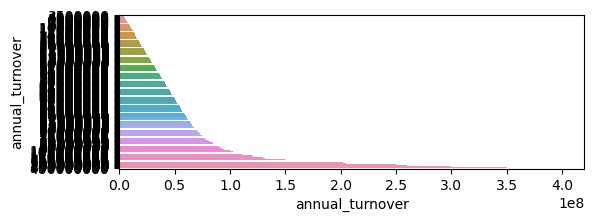

facebook_popularity_quotient


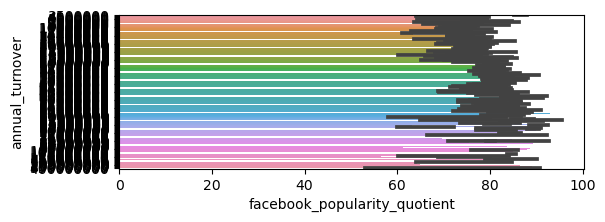

instagram_popularity_quotient


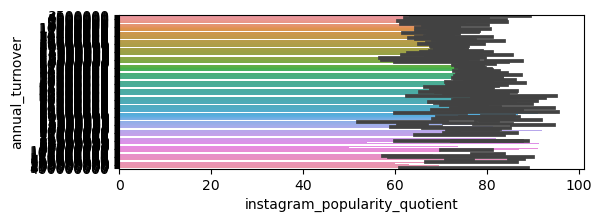

fire_audit


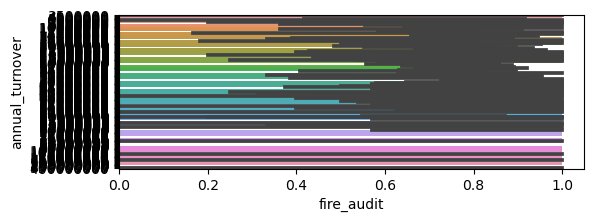

liquor_license_obtained


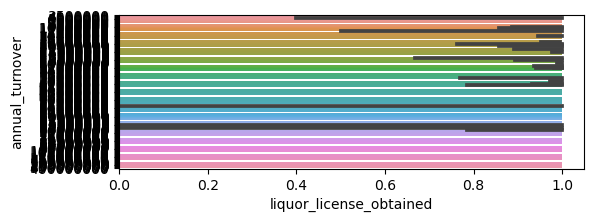

situated_in_a_multi_complex


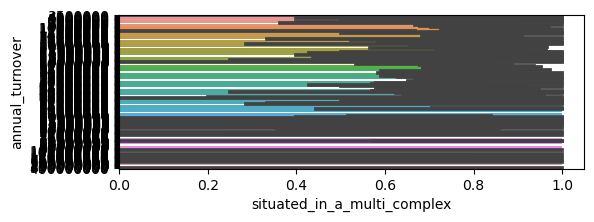

dedicated_parking


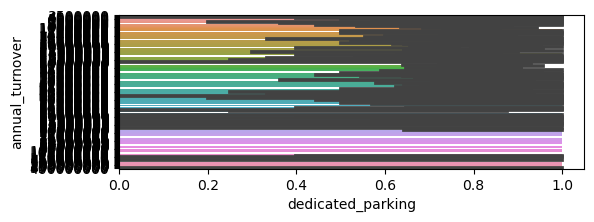

open_sitting_available


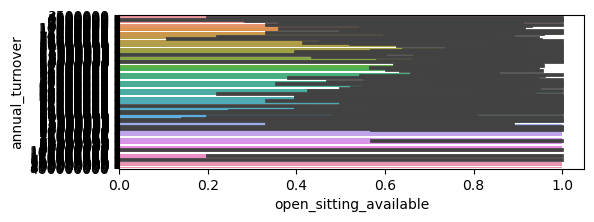

resturant_tier


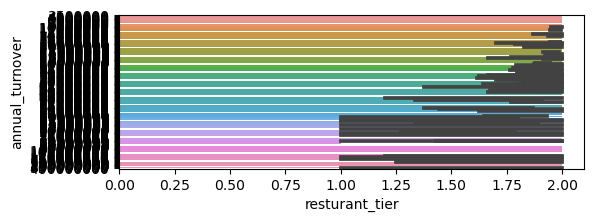

restaurant_zomato_rating


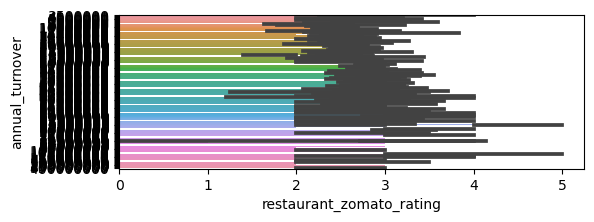

restaurant_city_tier


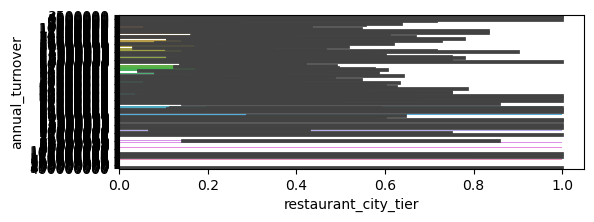

order_wait_time


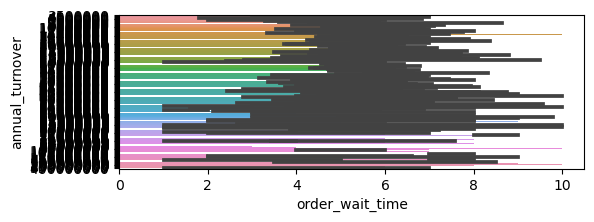

staff_responsivness


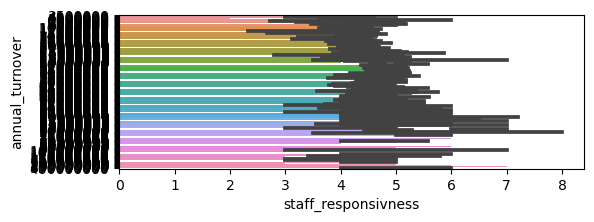

value_for_money


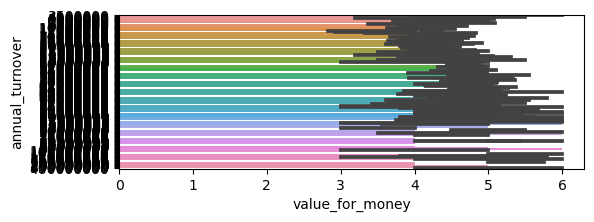

hygiene_rating


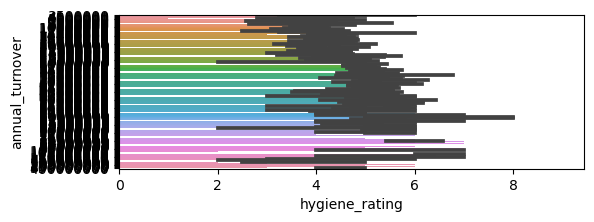

food_rating


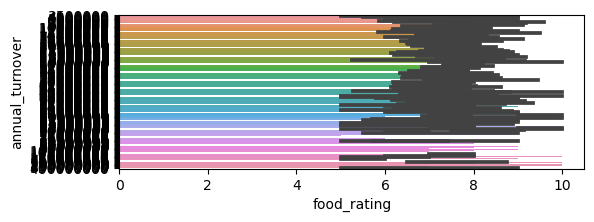

overall_restaurant_rating


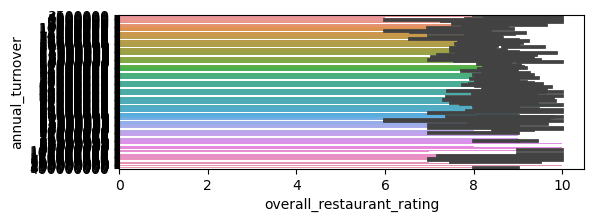

live_music_rating


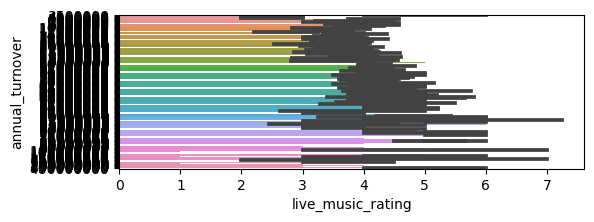

comedy_gigs_rating


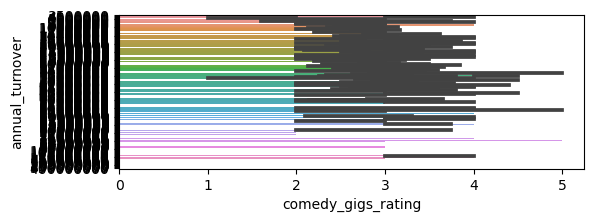

value_deals_rating


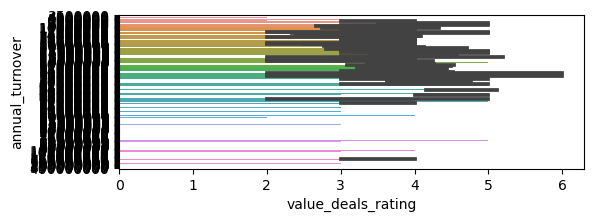

live_sports_rating


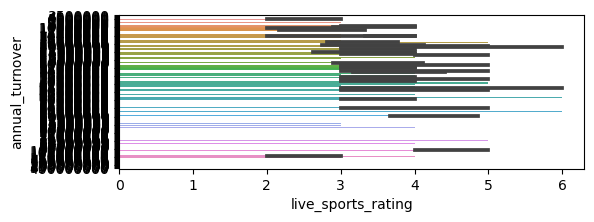

ambience


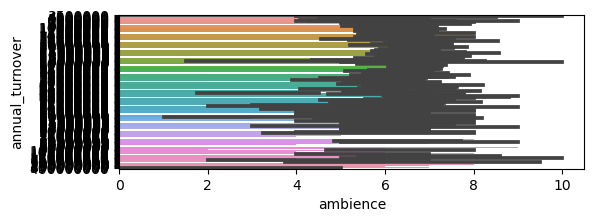

lively


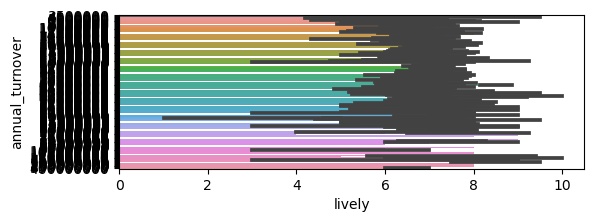

service


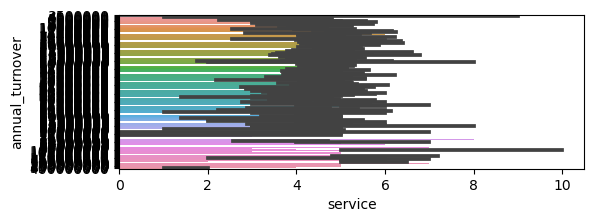

comfortablility


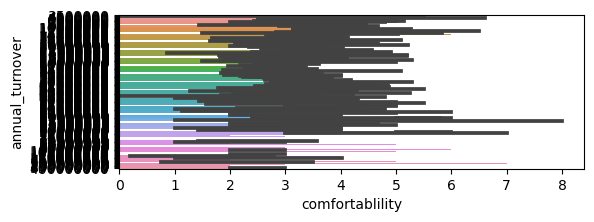

privacy


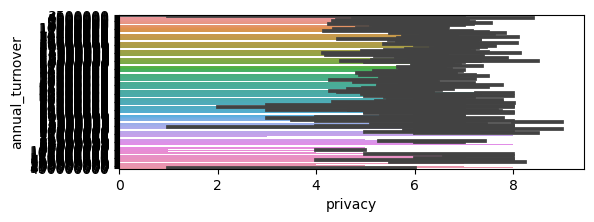

city_tier


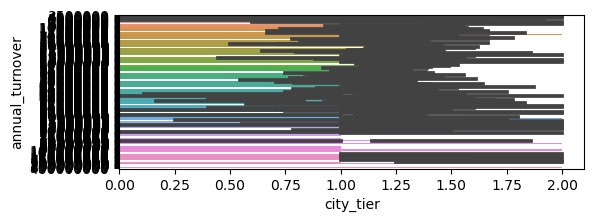

since_years


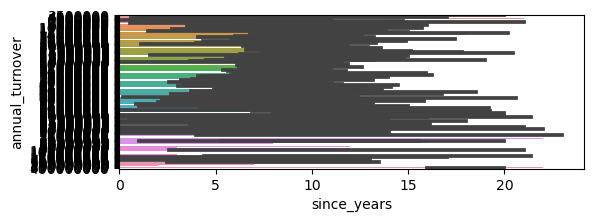

In [106]:
numeric_columns = raw.select_dtypes(exclude="object").columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(6, 2))
    print(col)
    #sns.boxplot(data=raw,x=col,y='Attrition_Flag',orient='h')
    sns.barplot(data=raw,x=col,y='annual_turnover' )
    plt.show()

In [136]:
df.corr()

    

annual_turnover  facebook_popularity_quotient  \
annual_turnover                       1.000000                      0.164640   
facebook_popularity_quotient          0.164640                      1.000000   
instagram_popularity_quotient         0.163220                      0.643456   
fire_audit                            0.031070                      0.016024   
liquor_license_obtained               0.025141                      0.110387   
situated_in_a_multi_complex          -0.056874                     -0.005349   
dedicated_parking                     0.024261                      0.027336   
open_sitting_available                0.001076                     -0.014381   
resturant_tier                       -0.185081                     -0.136507   
restaurant_zomato_rating              0.126454                      0.315732   
restaurant_city_tier                  0.009952                      0.124516   
order_wait_time                       0.005916                      0.018210   
staff_responsivness                   0.156468                      0.344557   
value_for_money                       0.162881                      0.303016   
hygiene_rating                        0.213869                      0.313571   
food_rating                           0.000302                     -0.019420   
overall_restaurant_rating             0.119151                      0.103344   
live_music_rating                     0.169350                      0.165464   
comedy_gigs_rating                    0.129354                      0.059491   
live_sports_rating                    0.178295                      0.353692   
ambience                             -0.053024                      0.069611   
lively                                0.056450                      0.138561   
service                              -0.022945                     -0.015997   
comfortablility                      -0.066480                     -0.128171   
privacy                              -0.020820                      0.038469   
city_tier                            -0.047255                     -0.071469   
since_years                          -0.007608                     -0.008353   

                               instagram_popularity_quotient  fire_audit  \
annual_turnover                                     0.163220    0.031070   
facebook_popularity_quotient                        0.643456    0.016024   
instagram_popularity_quotient                       1.000000    0.020763   
fire_audit                                          0.020763    1.000000   
liquor_license_obtained                             0.108979    0.015221   
situated_in_a_multi_complex                        -0.004193   -0.009899   
dedicated_parking                                   0.031005    0.008436   
open_sitting_available                             -0.022985    0.018462   
resturant_tier                                     -0.116065    0.020921   
restaurant_zomato_rating                            0.356769    0.024985   
restaurant_city_tier                                0.131300    0.002258   
order_wait_time                                     0.003729   -0.012021   
staff_responsivness                                 0.203074    0.006039   
value_for_money                                     0.231052    0.011929   
hygiene_rating                                      0.305836    0.011404   
food_rating                                        -0.016457    0.024754   
overall_restaurant_rating                           0.111077   -0.008562   
live_music_rating                                   0.136892   -0.020678   
comedy_gigs_rating                                  0.116099   -0.007323   
live_sports_rating                                  0.282048   -0.095731   
ambience                                            0.054163   -0.003718   
lively                                              0.100319    0.001014   
service                                   

<function matplotlib.pyplot.show(close=None, block=None)>

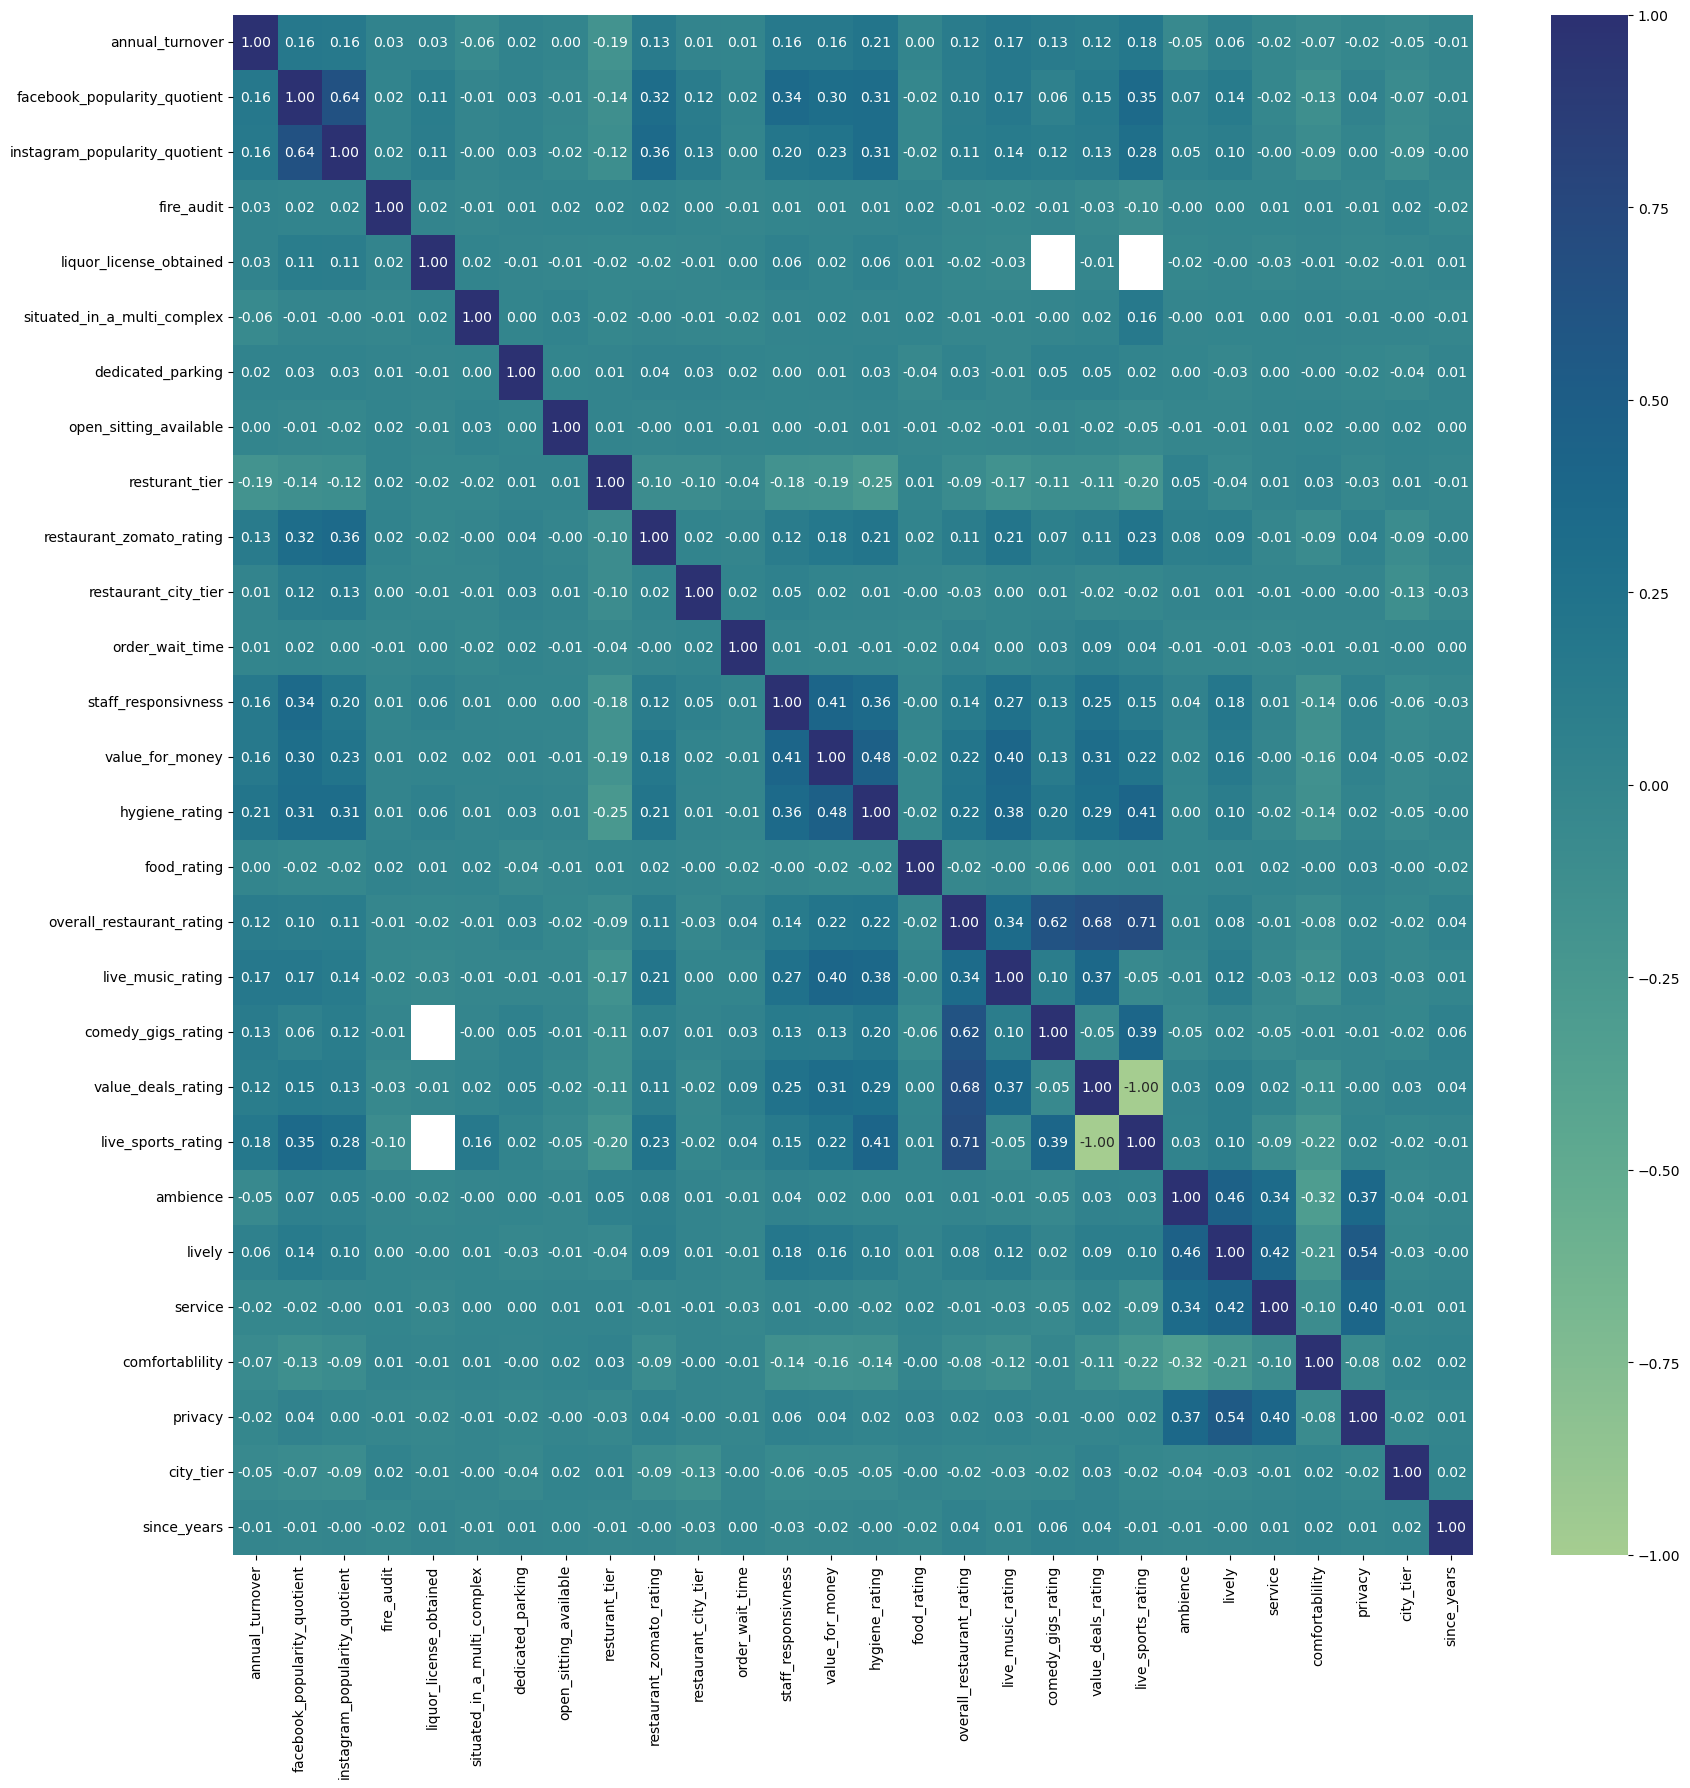

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='crest',fmt=".2f",annot=True)
plt.show
            

In [182]:
 df.drop(columns=['value_deals_rating'],axis=1,inplace=True)
# df['facebook_popularity_quotient'] =df['facebook_popularity_quotient'].fillna(0)
# df['instagram_popularity_quotient']= df['instagram_popularity_quotient'].fillna(0)
# df['resturant_tier'] =df['resturant_tier'].fillna(0)

df['overall_restaurant_rating'] =df['overall_restaurant_rating'].fillna(0)
df['live_music_rating'] =df['live_music_rating'].fillna(0)
df['comedy_gigs_rating'] =df['comedy_gigs_rating'].fillna(0)
df['live_sports_rating'] =df['live_sports_rating'].fillna(0)
df['ambience'] =df['ambience'].fillna(0)

In [178]:
df

annual_turnover restaurant_location  facebook_popularity_quotient  \
0            42000000   Near Business Hub                         84.30   
1            50000000      Near Party Hub                         85.40   
2            32500000   Near Business Hub                         85.00   
3           110000000      Near Party Hub                         85.60   
4            20000000      Near Party Hub                          0.00   
...               ...                 ...                           ...   
3488         40500000      Near Party Hub                         69.10   
3489         32500000      Near Party Hub                         91.00   
3490         42500000      Near Party Hub                         80.83   
3491         53000000      Near Party Hub                         79.40   
3492         12000000      Near Party Hub                         72.00   

           endorsed_by  instagram_popularity_quotient  fire_audit  \
0         Not Specific                          95.80           1   
1     Tier A Celebrity                          85.00           1   
2     Tier A Celebrity                          68.20           1   
3     Tier A Celebrity                          83.60           0   
4     Tier A Celebrity                          76.80           1   
...                ...                            ...         ...   
3488      Not Specific                          62.11           1   
3489      Not Specific                          96.30           1   
3490      Not Specific                          86.80           1   
3491      Not Specific                          86.00           1   
3492      Not Specific                          67.00           1   

      liquor_license_obtained  situated_in_a_multi_complex  dedicated_parking  \
0                           1                            1                  0   
1                           1                            1                  1   
2                           1                            1                  1   
3                           1                            1                  1   
4                           1                            1                  1   
...                       ...                          ...                ...   
3488                        1                            0                  1   
3489                        1                            0                  1   
3490                        1                            1                  1   
3491                        1                            1                  1   
3492                        1                            1                  1   

      open_sitting_available  ...  live_sports_rating ambience lively  \
0                          1  ...                 NaN      8.0      8   
1                          0  ...                 NaN      5.0      7   
2                          0  ...                 NaN      7.0     10   
3                          1  ...                 NaN      7.0      7   
4                          1  ...                 NaN      NaN      6   
...                      ...  ...                 ...      ...    ...   
3488                       1  ...                 NaN      7.0      7   
3489                       0  ...                 NaN      4.0      9   
3490                       0  ...                 3.0      6.0      8   
3491                       1  ...                 NaN      7.0      6   
3492                       1  ...                 NaN      6.0      9   

      service  comfortablility  privacy  cusinine1  cusinine2  city_tier  \
0           6                6        6     indian      irish          1   
1           7                3        8     indian      irish          2   
2           5                2        8    tibetan    italian          1   
3           4                3        5    turkish   nigerian          1   
4           2                4        6      i

<function matplotlib.pyplot.show(close=None, block=None)>

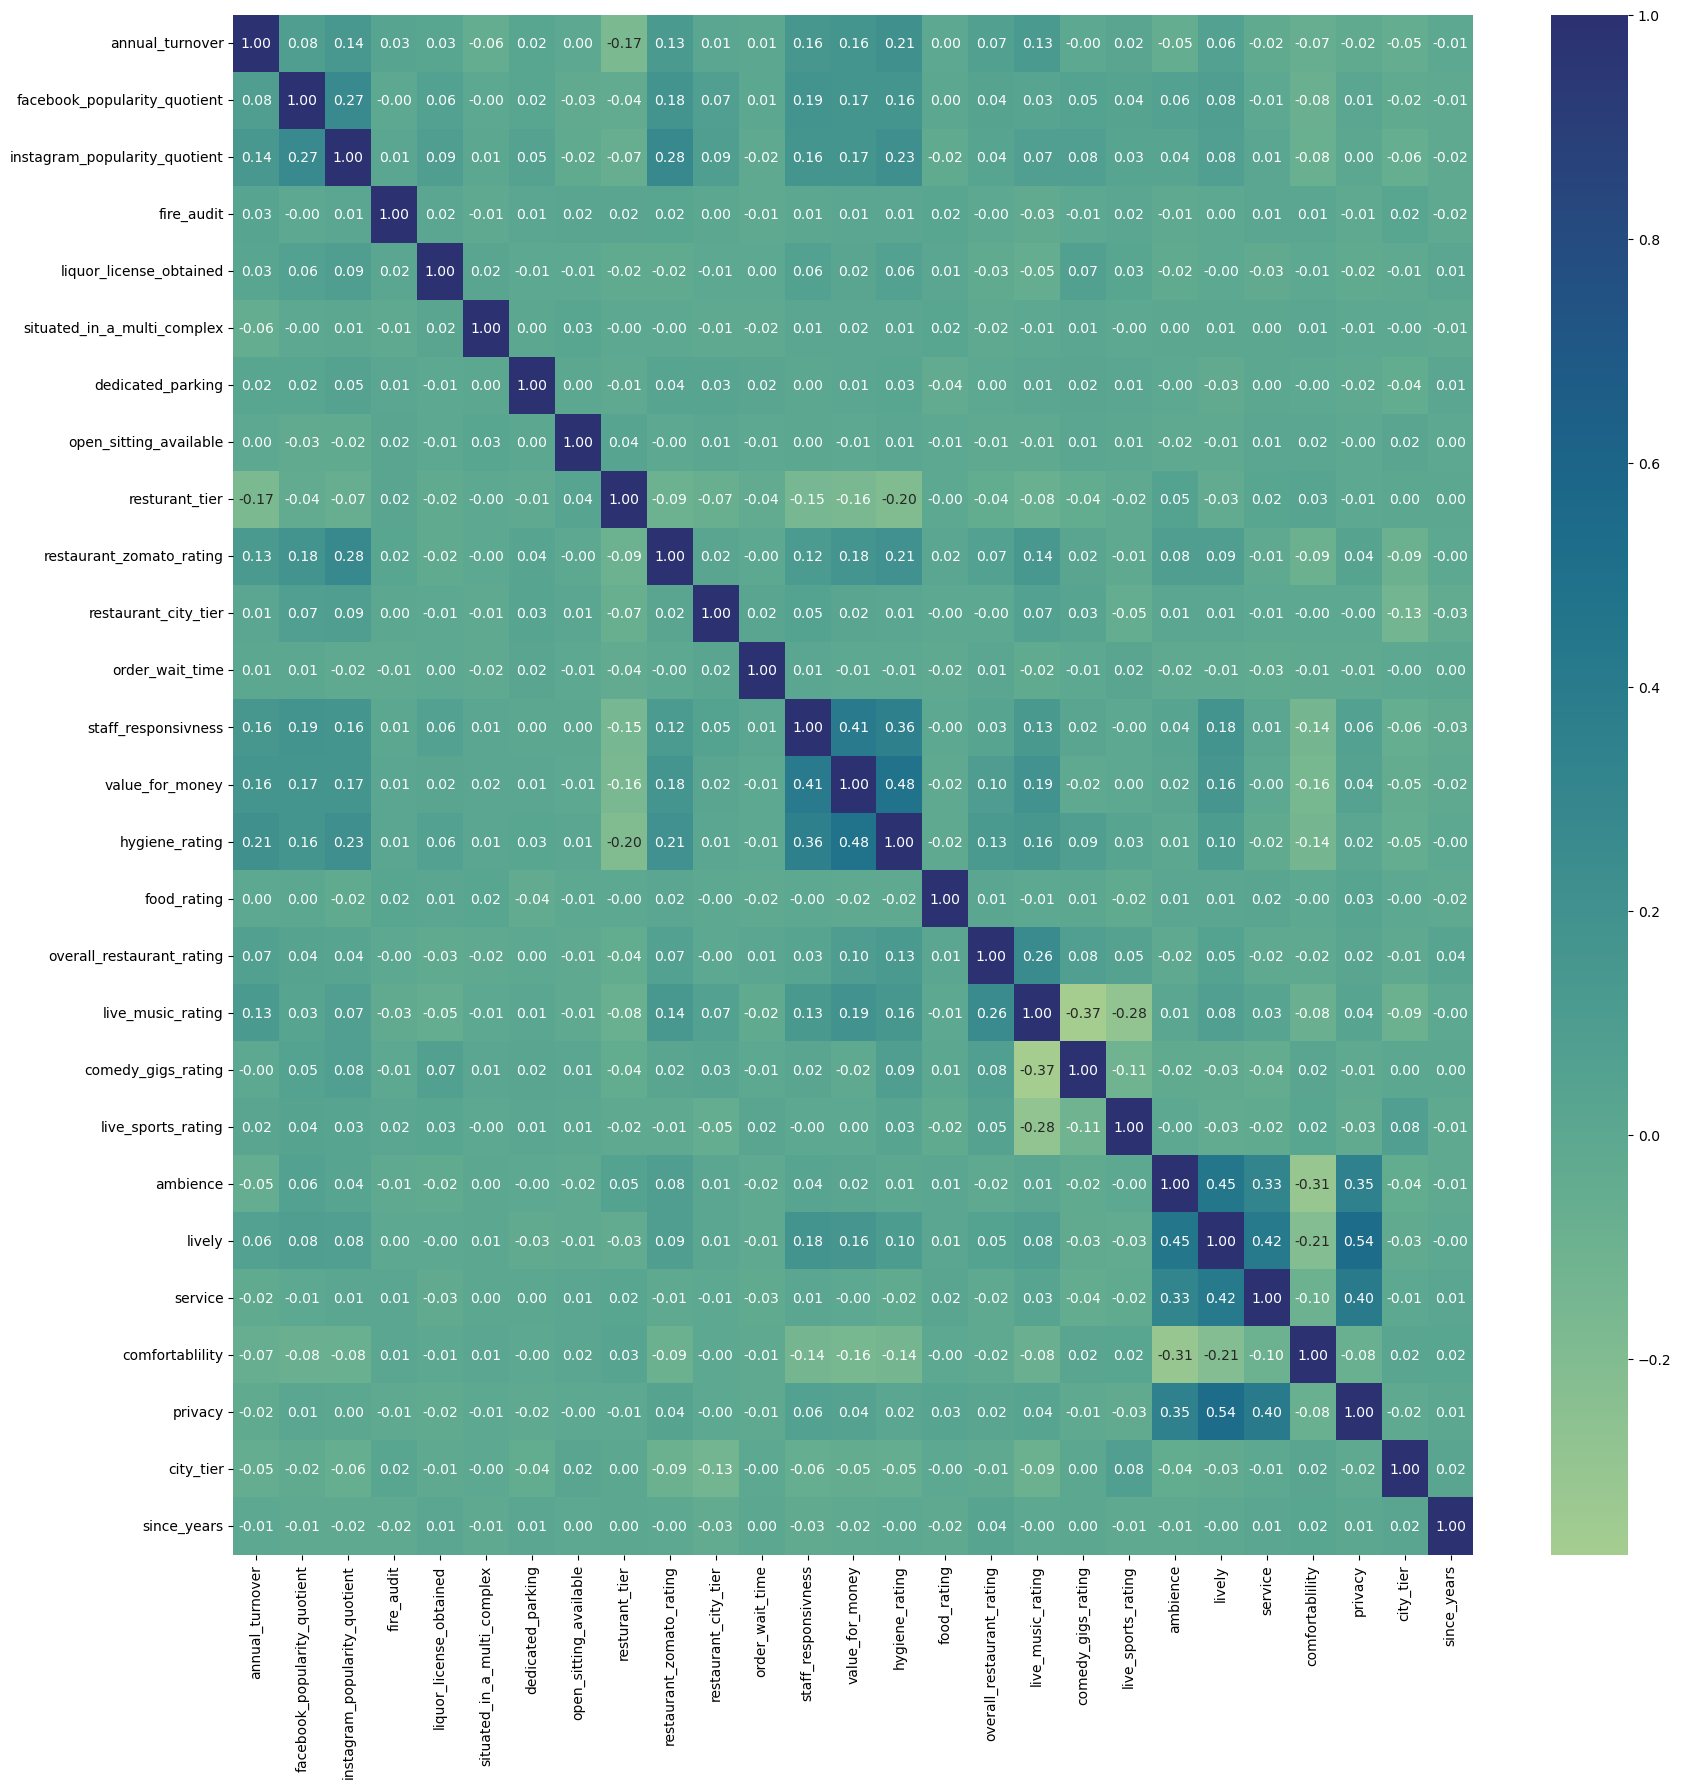

In [183]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='crest',fmt=".2f",annot=True)
plt.show

In [184]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [171]:
df_encoded.corr()

annual_turnover  facebook_popularity_quotient  \
annual_turnover                       1.000000                      0.164640   
facebook_popularity_quotient          0.164640                      1.000000   
instagram_popularity_quotient         0.163220                      0.643456   
fire_audit                            0.031070                      0.016024   
liquor_license_obtained               0.025141                      0.110387   
...                                        ...                           ...   
cusinine2_latvian                     0.047750                     -0.018595   
cusinine2_nigerian                    0.049895                     -0.001572   
cusinine2_salvadorian                -0.057696                     -0.020892   
cusinine2_sapnish                    -0.039465                     -0.032904   
cusinine2_thai                       -0.031953                     -0.016195   

                               instagram_popularity_quotient  fire_audit  \
annual_turnover                                     0.163220    0.031070   
facebook_popularity_quotient                        0.643456    0.016024   
instagram_popularity_quotient                       1.000000    0.020763   
fire_audit                                          0.020763    1.000000   
liquor_license_obtained                             0.108979    0.015221   
...                                                      ...         ...   
cusinine2_latvian                                  -0.026886   -0.007881   
cusinine2_nigerian                                 -0.011564    0.001537   
cusinine2_salvadorian                              -0.030570   -0.018191   
cusinine2_sapnish                                  -0.014820   -0.003290   
cusinine2_thai                                     -0.015128   -0.007722   

                               liquor_license_obtained  \
annual_turnover                               0.025141   
facebook_popularity_quotient                  0.110387   
instagram_popularity_quotient                 0.108979   
fire_audit                                    0.015221   
liquor_license_obtained                       1.000000   
...                                                ...   
cusinine2_latvian                             0.012590   
cusinine2_nigerian                            0.017768   
cusinine2_salvadorian                         0.023800   
cusinine2_sapnish                             0.009604   
cusinine2_thai                                0.010546   

                               situated_in_a_multi_complex  dedicated_parking  \
annual_turnover                                  -0.056874           0.024261   
facebook_popularity_quotient                     -0.005349           0.027336   
instagram_popularity_quotient                    -0.004193           0.031005   
fire_audit                                       -0.009899           0.008436   
liquor_license_obtained                           0.021170          -0.007486   
...                                                    ...                ...   
cusinine2_latvian                                 0.018008           0.019615   
cusinine2_nigerian                               -0.011380           0.010460   
cusinine2_salvadorian                             0.001738          -0.001724   
cusinine2_sapnish                                -0.002910          -0.031759   
cusinine2_thai                                   -0.007382          -0.000468   

                               open_sitting_available  resturant_tier  \
annual_turnover                              0.001076       -0.185081   
facebook_popularity_quotient                -0.014381       -0.136507   
instagram_popularity_quotient               -0.022985       -0.116065   
fire_audit                                   0.018462        0.020921   
liquor_license_obtained                     -0.007930       -0.020645   
...                                              

In [185]:
df_encoded.isnull().sum().where(lambda x: x!=0).dropna()

Series([], dtype: float64)

<Axes: xlabel='comedy_gigs_rating', ylabel='annual_turnover'>

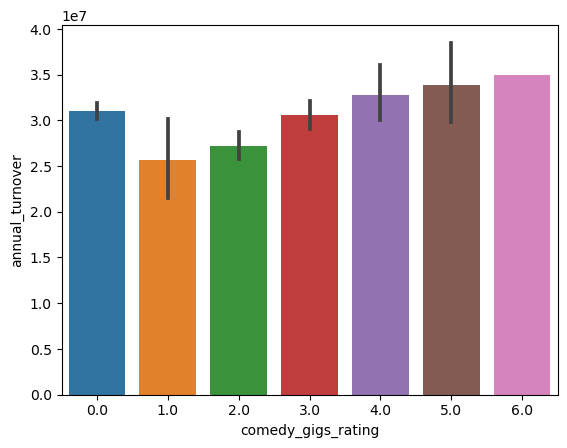

In [186]:
sns.barplot(df_encoded,x='comedy_gigs_rating',y='annual_turnover')

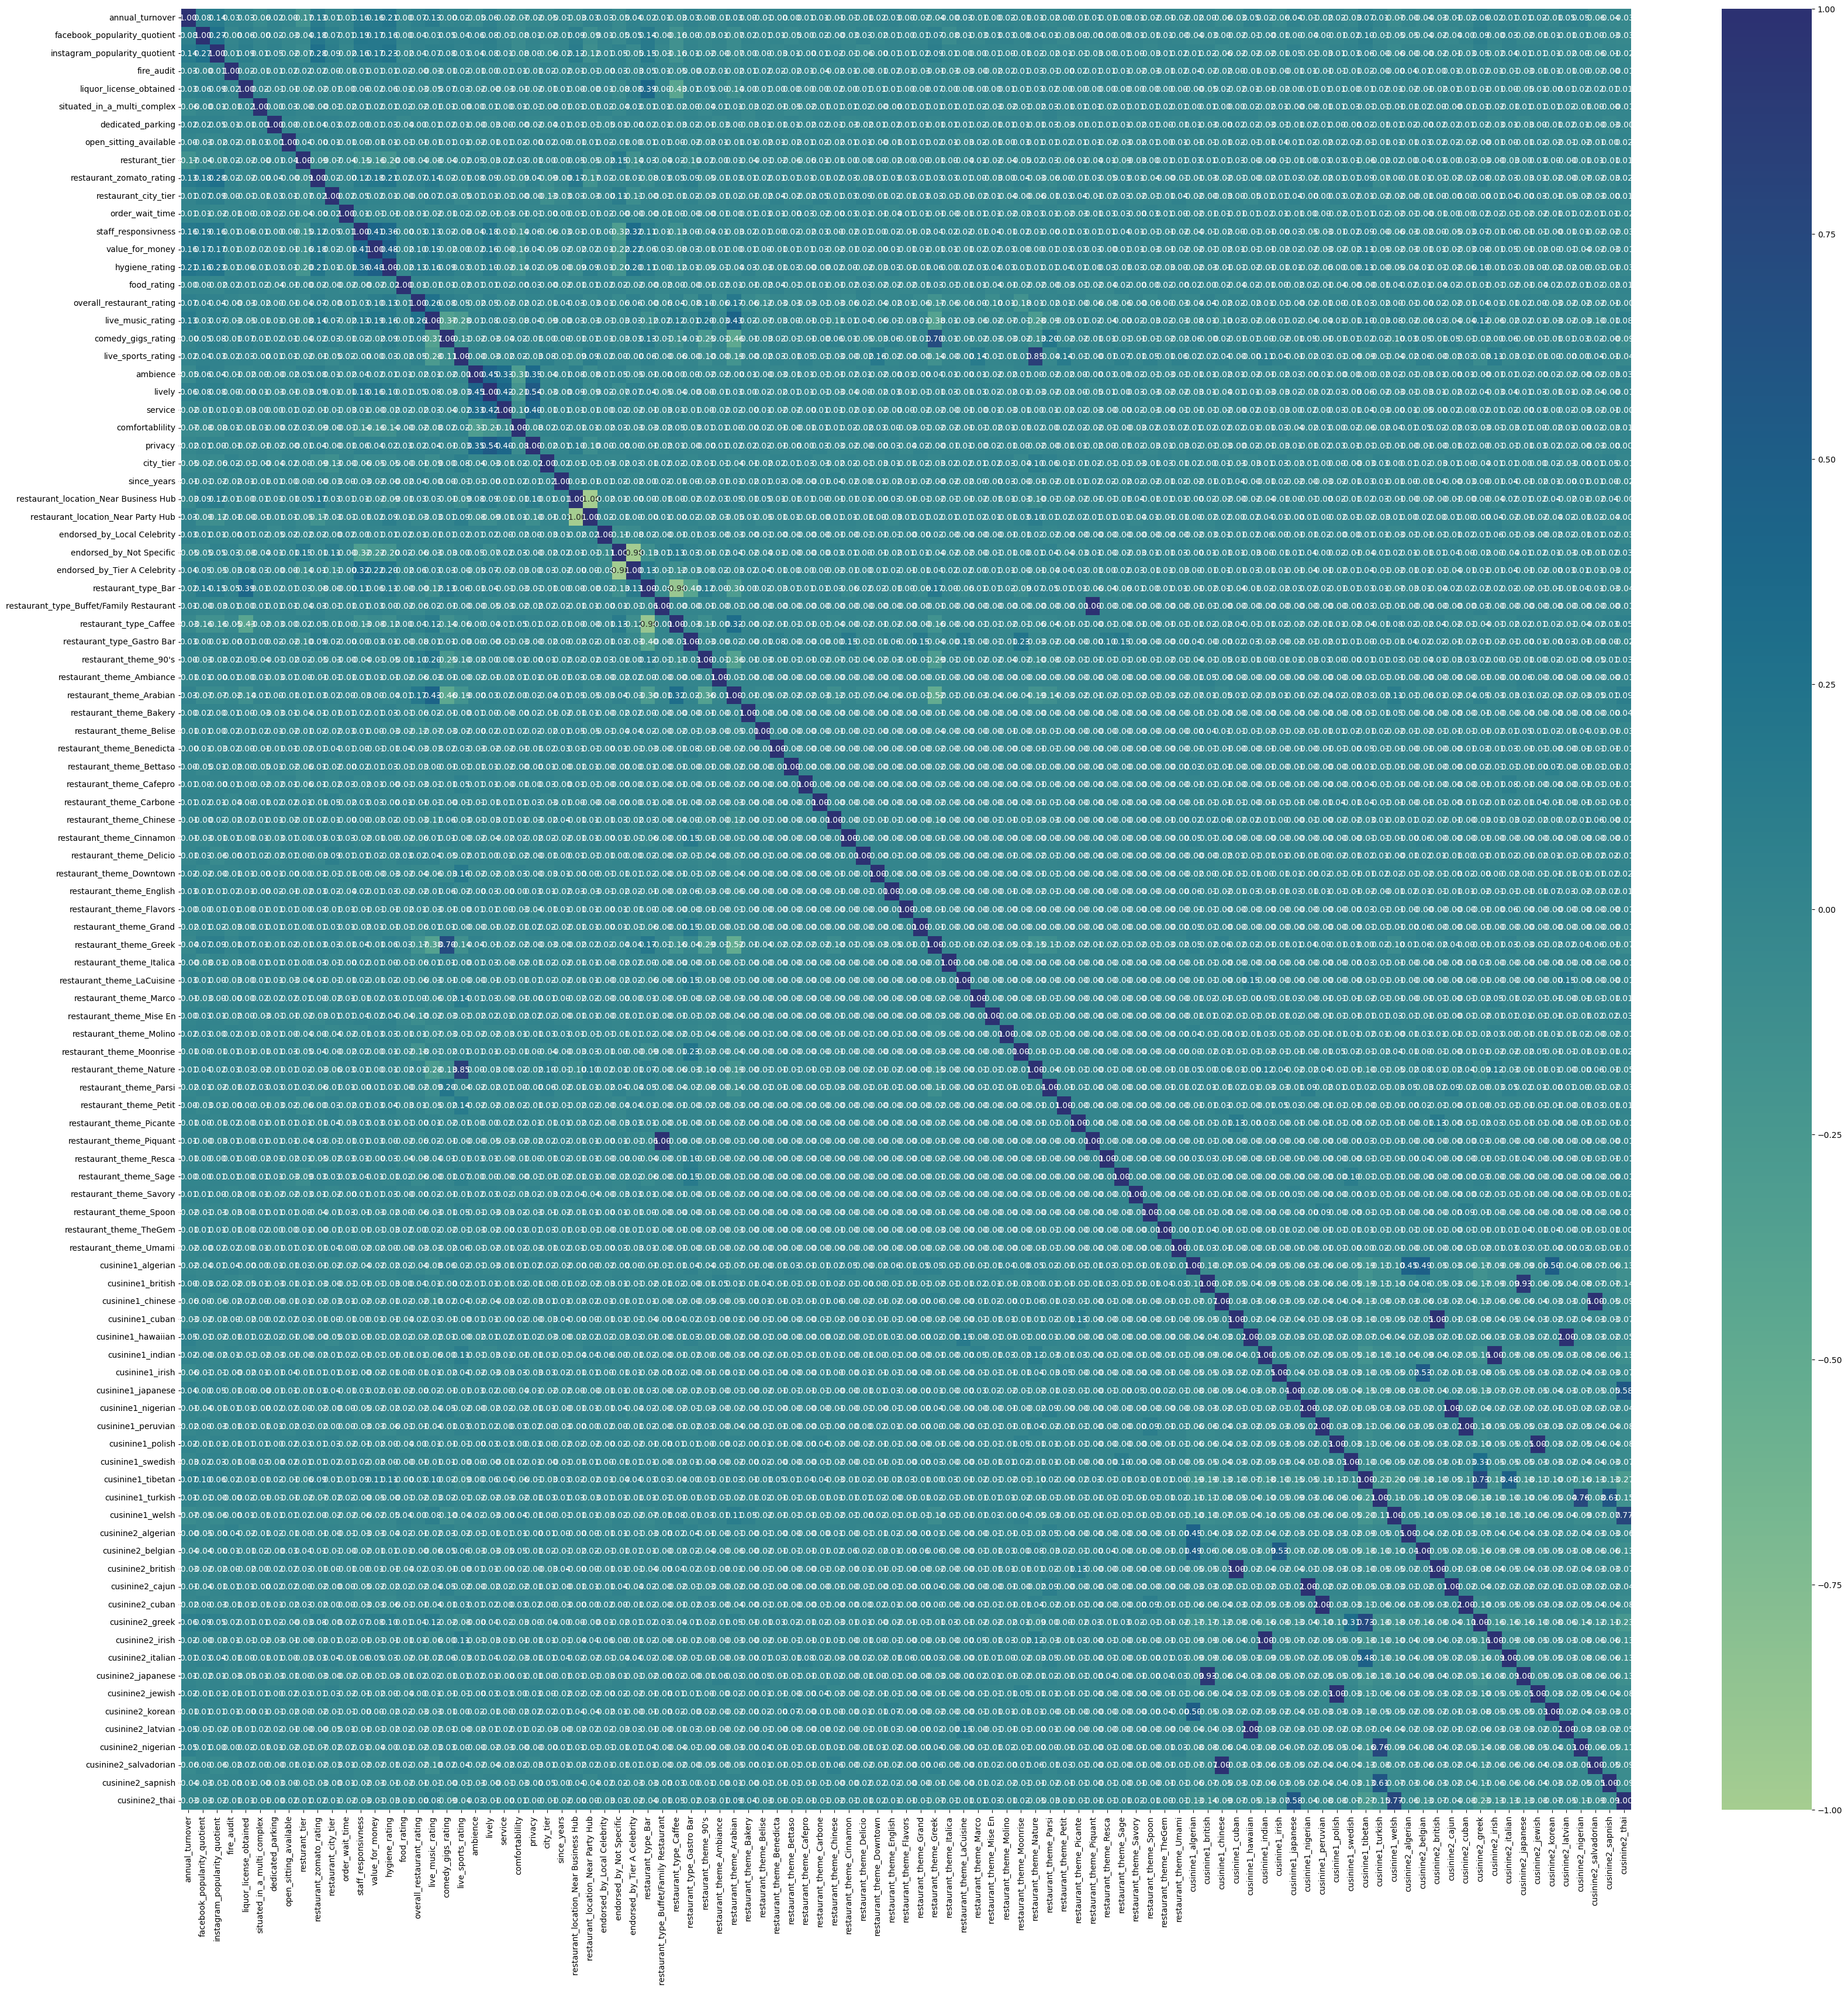

In [187]:
plt.figure(figsize=(40,40))
sns.heatmap(df_encoded.corr(),cmap='crest',fmt=".2f",annot=True)
plt.show()

In [165]:
df_encoded.isnull().sum().where(lambda x: x!=0).dropna()


facebook_popularity_quotient       99.0
instagram_popularity_quotient      56.0
resturant_tier                     49.0
overall_restaurant_rating         212.0
live_music_rating                 765.0
comedy_gigs_rating               2483.0
live_sports_rating               3288.0
ambience                           25.0
dtype: float64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annual_turnover                3493 non-null   int64  
 1   restaurant_location            3493 non-null   object 
 2   facebook_popularity_quotient   3394 non-null   float64
 3   endorsed_by                    3493 non-null   object 
 4   instagram_popularity_quotient  3437 non-null   float64
 5   fire_audit                     3493 non-null   int64  
 6   liquor_license_obtained        3493 non-null   int64  
 7   situated_in_a_multi_complex    3493 non-null   int64  
 8   dedicated_parking              3493 non-null   int64  
 9   open_sitting_available         3493 non-null   int64  
 10  resturant_tier                 3444 non-null   float64
 11  restaurant_type                3493 non-null   object 
 12  restaurant_theme               3493 non-null   o

In [188]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop(columns=['annual_turnover'])
y = df_encoded.annual_turnover
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size=0.30)

In [150]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

In [154]:
from sklearn.preprocessing import StandardScaler
def scale_data(x_train,x_test):
    scaler= StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    # Transform on test data
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled,x_test_scaled

In [152]:
from sklearn.preprocessing import MinMaxScaler
def scale_data_minmax(y_train,y_test):
    scaler = MinMaxScaler()
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
    # Transform on test data
    y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))
    return y_train_scaled,y_test_scaled

In [194]:
x_train_scaled,x_test_scaled = scale_data(x_train,x_test)

In [197]:
y_train_scaled,y_test_scaled= scale_data_minmax(y_train,y_test)

In [203]:
print(x_train_scaled.shape,x_test_scaled.shape,y_train_scaled.shape,y_test_scaled.shape)

(2445, 100) (1048, 100) (2445, 1) (1048, 1)


In [292]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
x_train_pca5=pca.fit_transform(x_train_scaled)

x_test_pca5=pca.transform(x_test_scaled)

print(x_train_pca5.shape,x_test_pca5.shape,y_train_scaled.shape,y_test_scaled.shape)

(2445, 8) (1048, 8) (2445, 1) (1048, 1)


In [293]:
lr = LinearRegression()
lr.fit(x_train_pca5, y_train_scaled)
y_pred_dt = lr.predict(x_test_pca5)
print(x_train_pca5.shape,x_test_pca5.shape,y_train_scaled.shape,y_test_scaled.shape,y_pred_dt.shape)

(2445, 8) (1048, 8) (2445, 1) (1048, 1) (1048, 1)


In [294]:
accuracy=mean_squared_error(y_test_scaled, y_pred_dt)
print( accuracy)

0.005490579544821909


In [296]:
br = BayesianRidge()
br.fit(x_train_scaled, y_train_scaled)
y_pred_dt = br.predict(x_test_scaled)
accuracy=mean_squared_error(y_test_scaled, y_pred_dt)
print(accuracy)

0.005222346104096233


In [297]:
br.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'max_iter': None,
 'n_iter': 'deprecated',
 'tol': 0.001,
 'verbose': False}

In [310]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'n_iter': [300, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}
grid_search = GridSearchCV(br, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(x_train_scaled, y_train_scaled)

# Best parameters


GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001],
                         'alpha_2': [1e-06, 1e-05, 0.0001],
                         'lambda_1': [1e-06, 1e-05, 0.0001],
                         'lambda_2': [1e-06, 1e-05, 0.0001],
                         'n_iter': [300, 500, 1000],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_root_mean_squared_error')

In [324]:
x_test_scaled.shape

(1048, 100)

In [323]:
#from sklearn.metrics import root_mean_squared_error
t= grid_search.predict(x_test_scaled)
accuracy=mean_squared_error(y_test_scaled, t)
print(accuracy)

0.005218321312435824


In [262]:
test_df=pd.read_csv('Test_dataset.csv')
test_df
a

Registration Number           Cuisine       City Restaurant Location  \
0                  20001   tibetan,italian  Bangalore   Near Business Hub   
1                  20002   tibetan,italian  Hyderabad      Near Party Hub   
2                  20003  algerian,belgian  Hyderabad      Near Party Hub   
3                  20004     tibetan,greek         -1      Near Party Hub   
4                  20005     cuban,british      Pune       Near Party Hub   
..                   ...               ...        ...                 ...   
495                20496      indian,irish      Noida      Near Party Hub   
496                20497     tibetan,greek  Bangalore      Near Party Hub   
497                20498      indian,irish  Bangalore      Near Party Hub   
498                20499     tibetan,greek    Chennai      Near Party Hub   
499                20500     tibetan,greek     Bhopal      Near Party Hub   

    Opening Day of Restaurant  Facebook Popularity Quotient      Endoresed By  \
0                    13/07/10                         78.00  Tier A Celebrity   
1                    05/09/11                         89.17      Not Specific   
2                    12/04/11                         84.00      Not Specific   
3                    16/01/05                         79.38      Not Specific   
4                    10/11/08                         84.67      Not Specific   
..                        ...                           ...               ...   
495                  08/09/09                         72.00      Not Specific   
496                  20/06/07                         78.28      Not Specific   
497                  19/06/10                         72.60  Tier A Celebrity   
498                  23/08/12                         93.40      Not Specific   
499                  10/03/10                         65.50      Not Specific   

     Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
0                            69.00           1                        1  ...   
1                            96.00           1                        1  ...   
2                            86.00           1                        1  ...   
3                            74.40           0                        1  ...   
4                            86.46           1                        1  ...   
..                             ...         ...                      ...  ...   
495                          72.00           1                        1  ...   
496                          53.55           1                        1  ...   
497                          71.40           0                        1  ...   
498                          95.90           1                        1  ...   
499                          68.20           1                        1  ...   

     Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                          6.0                NaN                 2.0   
1                          9.0                3.0                 NaN   
2                          6.0                3.0                 NaN   
3                          9.0                6.0                 NaN   
4                          NaN                NaN                 NaN   
..                         ...                ...                 ...   
495                        9.0                5.0                 NaN   
496                        8.0                3.0                 NaN   
497                        9.0                5.0                 NaN   
498                        9.0                6.0                 6.0   
499                        9.0                5.0                 NaN   

     Value Deals Rating Live Sports Rating Ambience  Lively  Service  \
0                   NaN                NaN        5       2        2   
1                   NaN                6.0        7       8        5   
2                   NaN                NaN        9  

In [263]:
test_df['cusinine1']=test_df['Cuisine'].str.split(',').str[0]
test_df['cusinine2']=test_df['Cuisine'].str.split(',').str[1]
test_df['City'] = test_df['City'].map(lambda x: x.lower().strip())

In [218]:
test_df.sample()

Registration Number          Cuisine       City Restaurant Location  \
1                20002  tibetan,italian  hyderabad      Near Party Hub   

  Opening Day of Restaurant  Facebook Popularity Quotient  Endoresed By  \
1                  05/09/11                         89.17  Not Specific   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
1                           96.0           1                        1  ...   

   Comedy Gigs Rating  Value Deals Rating  Live Sports Rating  Ambience  \
1                 NaN                 NaN                 6.0         7   

  Lively Service  Comfortablility  Privacy  cusinine1  cusinine2  
1      8       5                1        8    tibetan    italian  

[1 rows x 35 columns]

In [264]:
test_df['City'] = test_df['City'].replace('-1',np.nan)
test_df['City'] = test_df['City'].replace('vsakhapttnam','visakhapatnam')
test_df['City'] = test_df['City'].replace('vizag','visakhapatnam')
test_df['City'] = test_df['City'].replace('hyderabad(bhadurpally)','hyderabad')
test_df['City'] = test_df['City'].replace('kochi/cochin','kochi')
test_df['City'] = test_df['City'].replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')
test_df['City'] = test_df['City'].replace('punr','pune')
test_df['City'] = test_df['City'].replace('technopark, trivandrum','thiruvananthapuram')
#test_df['City'] = test_df['City'].replace('australia',np.nan)
test_df['City'] = test_df['City'].replace('am','ambala')
test_df['City'] = test_df['City'].replace('bhubaneswar','bhubaneshwar')
test_df['City'] = test_df['City'].replace('bhubneshwar','bhubaneshwar')
#test_df['City'] = test_df['City'].replace('dubai',np.nan)

In [265]:
test_df['City'] = test_df['City'].replace('indirapuram, ghaziabad','ghaziabad')
test_df['City'] = test_df['City'].replace('gaziabaad','ghaziabad')
test_df['City'] = test_df['City'].replace('jagdalpur','jabalpur')
test_df['City'] = test_df['City'].replace('delhi/ncr','delhi')

In [266]:
test_df['city_tier'] = test_df['City'].map(lambda x: find_city(x) )

In [267]:
test_df.drop(columns=['Registration Number','Cuisine','City'],inplace=True)

In [268]:
test_df['since_years']=test_df['Opening Day of Restaurant'].map(lambda x: 24-int(x[0:2]) if 24-int(x[0:2]) >=0 else 0)


In [269]:
test_df.drop(columns=['Opening Day of Restaurant'],inplace=True) 

In [270]:
test_df=test_df.rename(columns=col_map)

In [271]:
test_df.rename(columns={'Endoresed By':'endorsed_by'},inplace=True)

In [272]:
test_df.sample()

restaurant_location  facebook_popularity_quotient   endorsed_by  \
174      Near Party Hub                          78.0  Not Specific   

     instagram_popularity_quotient  fire_audit  liquor_license_obtained  \
174                           85.0           1                        1   

     situated_in_a_multi_complex  dedicated_parking  open_sitting_available  \
174                            1                  1                       0   

     resturant_tier  ... live_sports_rating ambience  lively  service  \
174               2  ...                NaN        7       8        6   

     comfortablility  privacy  cusinine1  cusinine2  city_tier  since_years  
174                6        7   nigerian      cajun          1           20  

[1 rows x 33 columns]

In [273]:
test_df.drop(columns=['value_deals_rating'],axis=1,inplace=True)
test_df['facebook_popularity_quotient'] =test_df['facebook_popularity_quotient'].fillna(0)
test_df['instagram_popularity_quotient']= test_df['instagram_popularity_quotient'].fillna(0)
test_df['resturant_tier'] =test_df['resturant_tier'].fillna(0)

test_df['overall_restaurant_rating'] =test_df['overall_restaurant_rating'].fillna(0)
test_df['live_music_rating'] =test_df['live_music_rating'].fillna(0)
test_df['comedy_gigs_rating'] =test_df['comedy_gigs_rating'].fillna(0)
test_df['live_sports_rating'] =test_df['live_sports_rating'].fillna(0)
test_df['ambience'] =test_df['ambience'].fillna(0)


In [274]:
categorical_columns

['restaurant_location',
 'endorsed_by',
 'restaurant_type',
 'restaurant_theme',
 'cusinine1',
 'cusinine2']

In [275]:
one_hot_encoded = encoder.transform(test_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
tdf_encoded = pd.concat([test_df, one_hot_df], axis=1)
tdf_encoded = tdf_encoded.drop(categorical_columns, axis=1)

In [276]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
tdf_encoded_scaled = scaler.transform(tdf_encoded)

In [277]:
tdf_encoded_scaled.shape

(500, 100)

In [278]:
test_df

restaurant_location  facebook_popularity_quotient       endorsed_by  \
0     Near Business Hub                         78.00  Tier A Celebrity   
1        Near Party Hub                         89.17      Not Specific   
2        Near Party Hub                         84.00      Not Specific   
3        Near Party Hub                         79.38      Not Specific   
4        Near Party Hub                         84.67      Not Specific   
..                  ...                           ...               ...   
495      Near Party Hub                         72.00      Not Specific   
496      Near Party Hub                         78.28      Not Specific   
497      Near Party Hub                         72.60  Tier A Celebrity   
498      Near Party Hub                         93.40      Not Specific   
499      Near Party Hub                         65.50      Not Specific   

     instagram_popularity_quotient  fire_audit  liquor_license_obtained  \
0                            69.00           1                        1   
1                            96.00           1                        1   
2                            86.00           1                        1   
3                            74.40           0                        1   
4                            86.46           1                        1   
..                             ...         ...                      ...   
495                          72.00           1                        1   
496                          53.55           1                        1   
497                          71.40           0                        1   
498                          95.90           1                        1   
499                          68.20           1                        1   

     situated_in_a_multi_complex  dedicated_parking  open_sitting_available  \
0                              1                  1                       0   
1                              1                  1                       1   
2                              1                  0                       1   
3                              1                  1                       1   
4                              1                  0                       0   
..                           ...                ...                     ...   
495                            1                  1                       1   
496                            1                  1                       0   
497                            0                  0                       1   
498                            0                  1                       0   
499                            0                  1                       1   

     resturant_tier  ... live_sports_rating ambience  lively  service  \
0                 2  ...                0.0        5       2        2   
1                 2  ...                6.0        7       8        5   
2                 2  ...                0.0        9       7        5   
3                 2  ...                0.0        6       7        6   
4                 1  ...                0.0        4       4        7   
..              ...  ...                ...      ...     ...      ...   
495               2  ...                0.0        7       8        5   
496               2  ...                0.0        9       8        8   
497               2  ...                0.0        1       6        5   
498               2  ...                0.0        7       7        2   
499               2  ...                0.0        7       6        6   

     comfortablility  privacy  cusinine1  cusinine2  city_tier  since_years  
0                  6        0    tibetan    italian          1           11  
1                  1        8    tibetan    italian          1           19  
2                  1        5   algerian    belgian          1           12  
3                  4        7    tibetan      greek          0  

In [279]:
tdf_encoded_scaled_pca5=pca.transform(tdf_encoded_scaled)


In [325]:
y_pred_dt = grid_search.predict(tdf_encoded_scaled)

In [315]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit_transform(y_train.values.reshape(-1, 1))

array([[0.11255411],
       [0.04761905],
       [0.04184704],
       ...,
       [0.09090909],
       [0.02453102],
       [0.07647908]])

In [322]:
print(tdf_encoded_scaled.shape)

(500, 100)


In [326]:
y_pred_dt

array([0.06474006, 0.10642347, 0.07609296, 0.09724321, 0.09354456,
       0.0996794 , 0.0667228 , 0.0746116 , 0.08204381, 0.07702435,
       0.06683778, 0.09417815, 0.06678172, 0.07631717, 0.05401174,
       0.07151701, 0.09303478, 0.05813896, 0.09153712, 0.08399782,
       0.05514164, 0.09055378, 0.07009681, 0.06659528, 0.08010195,
       0.06226035, 0.10011804, 0.09384368, 0.07512695, 0.06718749,
       0.08119822, 0.09751296, 0.06946285, 0.07561912, 0.06281713,
       0.07289892, 0.10406853, 0.09252665, 0.05037294, 0.06545783,
       0.07210453, 0.08066562, 0.07414091, 0.06004596, 0.08385077,
       0.06158997, 0.06583517, 0.09379179, 0.05952867, 0.07903532,
       0.09264905, 0.09551383, 0.05545695, 0.07295098, 0.08331031,
       0.08858411, 0.07300661, 0.09209083, 0.07731041, 0.07078616,
       0.04269462, 0.08551182, 0.10454403, 0.10352946, 0.08817927,
       0.09203587, 0.06698656, 0.05425225, 0.08333286, 0.1098051 ,
       0.08193619, 0.05512991, 0.06678447, 0.0787232 , 0.07487

In [327]:
result_df_pca = pd.DataFrame(minmaxscaler.inverse_transform(y_pred_dt.reshape(-1,1)))

In [283]:
result_df_pca

0
0    3.114317e+07
1    3.596907e+07
2    2.917853e+07
3    3.347006e+07
4    2.598930e+07
..            ...
495  3.157714e+07
496  3.029762e+07
497  3.559146e+07
498  3.699789e+07
499  3.124095e+07

[500 rows x 1 columns]

In [328]:
odf = pd.read_csv('Test_dataset.csv')
result = odf.join(result_df_pca)

In [285]:
result

Registration Number           Cuisine       City Restaurant Location  \
0                  20001   tibetan,italian  Bangalore   Near Business Hub   
1                  20002   tibetan,italian  Hyderabad      Near Party Hub   
2                  20003  algerian,belgian  Hyderabad      Near Party Hub   
3                  20004     tibetan,greek         -1      Near Party Hub   
4                  20005     cuban,british      Pune       Near Party Hub   
..                   ...               ...        ...                 ...   
495                20496      indian,irish      Noida      Near Party Hub   
496                20497     tibetan,greek  Bangalore      Near Party Hub   
497                20498      indian,irish  Bangalore      Near Party Hub   
498                20499     tibetan,greek    Chennai      Near Party Hub   
499                20500     tibetan,greek     Bhopal      Near Party Hub   

    Opening Day of Restaurant  Facebook Popularity Quotient      Endoresed By  \
0                    13/07/10                         78.00  Tier A Celebrity   
1                    05/09/11                         89.17      Not Specific   
2                    12/04/11                         84.00      Not Specific   
3                    16/01/05                         79.38      Not Specific   
4                    10/11/08                         84.67      Not Specific   
..                        ...                           ...               ...   
495                  08/09/09                         72.00      Not Specific   
496                  20/06/07                         78.28      Not Specific   
497                  19/06/10                         72.60  Tier A Celebrity   
498                  23/08/12                         93.40      Not Specific   
499                  10/03/10                         65.50      Not Specific   

     Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
0                            69.00           1                        1  ...   
1                            96.00           1                        1  ...   
2                            86.00           1                        1  ...   
3                            74.40           0                        1  ...   
4                            86.46           1                        1  ...   
..                             ...         ...                      ...  ...   
495                          72.00           1                        1  ...   
496                          53.55           1                        1  ...   
497                          71.40           0                        1  ...   
498                          95.90           1                        1  ...   
499                          68.20           1                        1  ...   

     Live Music Rating  Comedy Gigs Rating  Value Deals Rating  \
0                  NaN                 2.0                 NaN   
1                  3.0                 NaN                 NaN   
2                  3.0                 NaN                 NaN   
3                  6.0                 NaN                 NaN   
4                  NaN                 NaN                 NaN   
..                 ...                 ...                 ...   
495                5.0                 NaN                 NaN   
496                3.0                 NaN                 NaN   
497                5.0                 NaN                 4.0   
498                6.0                 6.0                 NaN   
499                5.0                 NaN                 NaN   

     Live Sports Rating Ambience Lively  Service  Comfortablility  Privacy  \
0                   NaN        5      2        2                6        0   
1                   6.0        7      8        5                1        8   
2                   NaN        9      7        5                1        5   
3                   NaN        6      7  

In [329]:
result.rename(columns={0:'Annual Turnover'},inplace=True)

In [330]:
result[['Registration Number','Annual Turnover']].to_csv('submission.csv',index = False)